In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Rectificador onda completa

- Resistencia lim primario $R=1$ $k\Omega$, resis carga $Rc=10$ $k\Omega$
- 4 Diodos de silicio, tensión de apertura $\Delta V\approx0.6$ $V$ por c/u
- Fuente sinusoidal, de aplitud $10V$, frecuencia $f=1$ $k Hz$


### Cargo datos

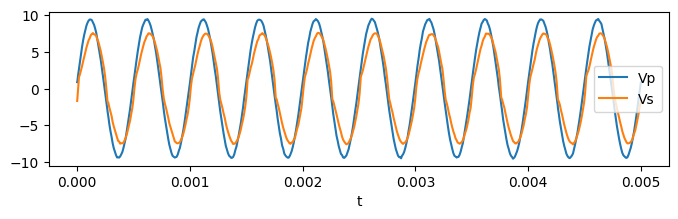

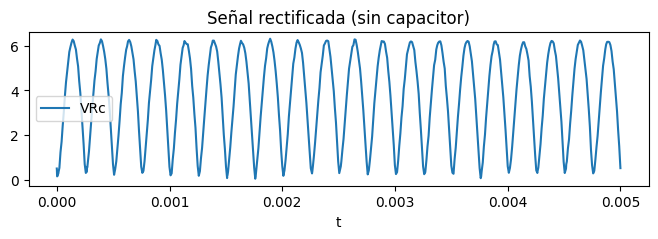

In [70]:
df = pd.read_csv("datos/rect_onda_completa.csv")
df.plot( x='t', y=["Vp","Vs"],figsize=(8,2) )
df.plot( x='t', y=["VRc"],figsize=(8,2), title="Señal rectificada (sin capacitor)" )
plt.show()

In [71]:
# rutinita para interpretar el ripple
def interpretar_ripple(x):
    if x<5:
        return "Muy bueno"
    elif x>=5 and x<10:
        return "Aceptable"
    elif x>10:
        return "Demasiado alto"


# calculo estadísiticas
mu = df['VRc'].mean()
sd = df['VRc'].std()
Vpp = df['VRc'].max()-df['VRc'].min()

ripple = 100*sd/mu

print("Stats:")
print(f"Valor medio VR (mean): {mu:.3f} [V]")
print(f"Desv estand VR (std) : {sd:.3f} [V]")
print(f"Valor Pk2Pk (max-min): {Vpp:.3f} [V]")
print(f"Factor de ripple γ : {ripple:.3f} % ({interpretar_ripple(ripple)})")

Stats:
Valor medio VR (mean): 3.618 [V]
Desv estand VR (std) : 2.078 [V]
Valor Pk2Pk (max-min): 6.248 [V]
Factor de ripple γ : 57.436 % (Demasiado alto)


## Simulación con distintos capacitores de filtrado


Se mide utilizando distintos valores de capacitancia para suavizar la señal,

- Cid 1 : $C=100$ $nF$
- Cid 2 : $C=330$ $nF$
- Cid 3 : $C=1$ $uF$
- Cid 4 : $C=4.7$ $uF$

Los datos fueron guardados formando una pila con los distintos casos. En este contexto al archivo de datos ademas de contener las columnas con el tiempo y la tensión en los bornes de $Rc$, tiene la columna **Cid** que identifica a que grupo pertenece cada linea de datos, esto facilitará su separación en el preprocesamiento, como ya veremos. 


In [72]:
df2 = pd.read_csv("datos/rect_onda_completa_C_filtrado.csv")

C = [ 100e-9,330e-9,1e-6,4.7e-6 ] #valores capacitores utilizados
Clabel = [ "100 nF","330 nF","1 uF","4.7 uF" ] #armo vector con labels para valores de C, útil para plotear

df2["t"]*=1e3 # paso el tiempo a milisegundos para más placer

df2.head()

,t,VRc,Cid
0,0.000000,0.000000e+00,1
1,0.000198,5.511300e-16,1
2,0.000394,4.496330e-15,1
3,0.000787,3.961003e-14,1
4,0.001573,4.748555e-13,1


Separo las mediones. Armo una lista de DataFrames para poder acceder facilmente en el procesamiento,

In [73]:
Df= []
Df.append( df2[ df2["Cid"]==1].copy() )
Df.append( df2[ df2["Cid"]==2].copy() )
Df.append( df2[ df2["Cid"]==3].copy() )
Df.append( df2[ df2["Cid"]==4].copy() )

Grafico los resultados,

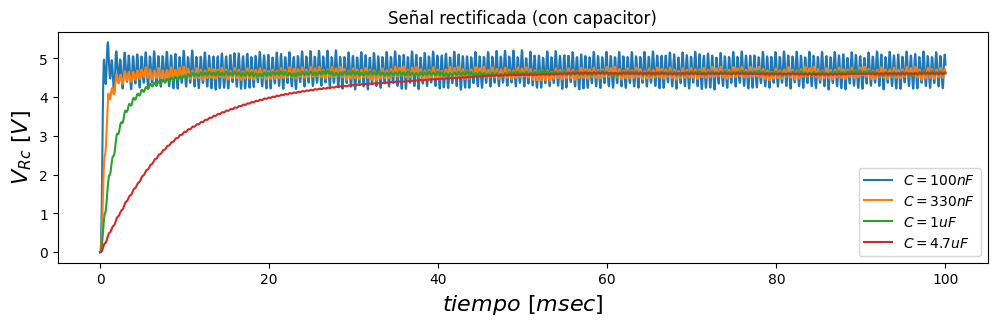

In [74]:
# plot
fig, ax = plt.subplots(figsize=(12,3))

for i in range(4): 
    Df[i].plot( x='t', y="VRc", ax=ax, label= f'$C = {Clabel[i]}$' )

ax.set_ylabel("$V_{Rc}$ $[V]$", fontsize=16)
ax.set_xlabel("$tiempo$ $[msec]$", fontsize=16)
ax.set_title("Señal rectificada (con capacitor)")
ax.legend(loc=4)
plt.show()

Observaciones:

- Visualmente se observa claramente que el rizado disminuye a medida que se aumenta C.
- Vemos también que pagamos un tiempo de carga mayor cuando utilizamos valores altos de C: la señal tarda más en alcanzar su valor de continua.

A continuación calculamos algunas estadísticas y evaluamos el factor de ripple,

In [75]:
# calculo estadísiticas

for i in range(4): 

    dfi = Df[i]

    dfi = dfi[ dfi["t"]>60 ]

    mu = dfi["VRc"].mean()
    sd = dfi["VRc"].std()
    Vpp= dfi["VRc"].max() - Df[i]["VRc"].min()
    ripple = 100*sd/mu

    print(f"\nCapacitor : {Clabel[i]}")
    print(f"Valor medio VR (mean): {mu:.3f} [V]")
    print(f"Desv estand VR (std) : {sd:.3f} [V]")
    print(f"Valor Pk2Pk (max-min): {Vpp:.3f} [V]")
    print(f"Factor de ripple γ : {ripple:.3f} % ({interpretar_ripple(ripple)})")


Capacitor : 100 nF
Valor medio VR (mean): 4.606 [V]
Desv estand VR (std) : 0.246 [V]
Valor Pk2Pk (max-min): 5.182 [V]
Factor de ripple γ : 5.335 % (Aceptable)

Capacitor : 330 nF
Valor medio VR (mean): 4.592 [V]
Desv estand VR (std) : 0.078 [V]
Valor Pk2Pk (max-min): 4.786 [V]
Factor de ripple γ : 1.692 % (Muy bueno)

Capacitor : 1 uF
Valor medio VR (mean): 4.605 [V]
Desv estand VR (std) : 0.028 [V]
Valor Pk2Pk (max-min): 4.694 [V]
Factor de ripple γ : 0.597 % (Muy bueno)

Capacitor : 4.7 uF
Valor medio VR (mean): 4.604 [V]
Desv estand VR (std) : 0.008 [V]
Valor Pk2Pk (max-min): 4.626 [V]
Factor de ripple γ : 0.183 % (Muy bueno)


Observaciones:

- Vemos que en todos los casos el valor de ripple es bueno.
- Se mejora mucho el valor medio de la señal respecto al caso son capacitor: obtenemos una tensión media de salida bastante más alta.
